<a href="https://colab.research.google.com/github/mikedcurry/DS-Unit-2-Kaggle-Challenge/blob/master/Curry_221_assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Try other [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```



In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.0)
Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge
 * branch            master     -> FETCH_HEAD
Already up to date.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
%matplotlib inline
import itertools
from math import floor
import matplotlib.pyplot as plt
import seaborn as sns

### Split: Train / Valdt / Test

In [4]:
# Split train into train & val
train, valdt = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

train.shape, valdt.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [0]:
import plotly.express as px

In [129]:
px.scatter(train, x='longitude', y='latitude', color='status_group', opacity=0.1)

# Null Island

In [10]:
train.describe()

# used this to inspect that null island guy with a close to zero value...

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,38016.000000,38016.00000,38016.000000,38016.000000,3.801600e+04,38016.000000,38016.000000,38016.000000,38016.000000,38016.000000
mean,37091.351931,333.64687,669.305503,34.083699,-5.698763e+00,0.462700,15.239610,5.629945,179.434764,1302.847775
std,21379.855379,3370.14408,692.967971,6.546679,2.934554e+00,12.383736,17.494734,9.631681,462.698582,950.982464
min,0.000000,0.00000,-63.000000,0.000000,-1.156858e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18638.750000,0.00000,0.000000,33.083734,-8.519295e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37074.500000,0.00000,372.000000,34.906342,-5.008002e+00,0.000000,12.000000,3.000000,29.000000,1986.000000
75%,55494.500000,25.00000,1319.000000,37.168246,-3.328358e+00,0.000000,17.000000,5.000000,214.000000,2004.000000
max,74247.000000,350000.00000,2770.000000,40.344301,-2.000000e-08,1776.000000,99.000000,80.000000,15300.000000,2013.000000


In [14]:
train.shape


(38016, 40)

In [0]:
import numpy as np

def wrangle(X):
    
    # Wierd, but it helps X to not get screwed up if this function does work the first time around
    X = X.copy()
    
    # first, convert all the ones close to zero to 0
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # next, treat zeros as NaNs, cause they are
    cols_with_zeros = ['longitude', 'latitude']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
            
    # duplicate column, same as quantity
    #X = X.drop(columns='quantity_group') # not sure how this is already removed... whatev
    
    return X


train = wrangle(train)
valdt = wrangle(valdt)
test = wrangle(test)

In [19]:
fig = px.scatter_mapbox(train, lat='latitude', lon='longitude', color='status_group', opacity=.3)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

### Looking at possible features

Note: 'id', and 'status_group' are still included...

In [0]:
train['region_code'] = train['region_code'].astype('category')



In [25]:
train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [9]:
# way to SEE all numberic columns:

train.select_dtypes('number').columns

# Note: 'id'

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'district_code', 'population', 'construction_year'],
      dtype='object')

In [10]:
# way to SEE all catagorical columns:

train.describe(exclude='number').columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'region_code', 'lga', 'ward', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [0]:
target = 'status_group'

train_features = train.drop(columns=[target, 'id'])

num_features = train_features.select_dtypes(include='number').columns.tolist()



In [15]:
# filter catagorical features for those with less than cardinality of 50 

all_cats = train_features.select_dtypes(exclude='number').nunique()

cat_features = all_cats[all_cats <= 100].index.tolist()

features = cat_features + num_features

features

['basin',
 'region',
 'region_code',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'district_code',
 'population',
 'construction_year']

In [25]:
# Looking at all catigorical features, cardinality in descending order

all_cats.sort_values(ascending=False)

wpt_name                 30661
subvillage               17231
scheme_name               2563
ward                      2082
installer                 1929
funder                    1716
date_recorded              349
lga                        124
region_code                 27
region                      21
extraction_type             18
extraction_type_group       13
scheme_management           12
management                  12
source                      10
basin                        9
water_quality                8
payment_type                 7
extraction_type_class        7
waterpoint_type              7
source_type                  7
payment                      7
quality_group                6
waterpoint_type_group        6
quantity                     5
quantity_group               5
management_group             5
source_class                 3
public_meeting               2
permit                       2
recorded_by                  1
dtype: int64

In [0]:
# Naming exact features of which type I want to include...

target = 'status_group'

categorical_features = ['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'region_code', 'lga', 'ward', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',] 
numeric_features = ['amount_tsh', 'gps_height', 'longitude', 'latitude',
        'district_code', 'population', 'construction_year']
features = categorical_features + numeric_features

In [0]:
features2 = ['basin',
 'region',
 'region_code',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'district_code',
 'population',
 'construction_year']

In [0]:
# Need to split train and valdt into further X features matrix and y target vector


X_train = train[features2]
y_train = train[target]

X_valdt = valdt[features2]
y_valdt = valdt[target]

X_test = test[features2]

## Using Logistic Regression and Dicision Tree models:
also pipelines

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [0]:
# Without a pipeline: 

# Subset / one-hot / standard-scale / fit / score 

X_train_subset = X_train[features]    # Really don't want to use the whole df --> just a new subset
X_val_subset = X_valdt[features]  


encoder = ce.OneHotEncoder(use_cat_names=True) 

X_train_encoded = encoder.fit_transform(X_train_subset)  # fit&transform X_train with our newly selected features (includes the catagotical)
X_val_encoded = encoder.transform(X_val_subset)      


scaler = StandardScaler()    

X_train_scaled = scaler.fit_transform(X_train_encoded)   
X_val_scaled = scaler.transform(X_val_encoded)     


model = LogisticRegression()
model.fit(X_train_scaled, y_train)


print('Validation Accuracy', model.score(X_val_scaled, y_valdt))

In [20]:
# With a pipline: 

#one-hot / standard-scale / fit / score 
# (note: subset already dertermined ABOVE when defining X_train, etc. )

pipe = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),                          # also I'm using this, cause...
    StandardScaler(),
    LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
    )

# fit model to train set
pipe.fit(X_train, y_train)

# score model on valdt set
print('Validate Yo Self:', pipe.score(X_valdt, y_valdt))

Validate Yo Self: 0.7321548821548821


In [75]:
# I was looking at the one-hot results for a second...

encoder2 = ce.OneHotEncoder(use_cat_names=True)
encoded2 = encoder2.fit_transform(X_train['quantity'])
encoded2.head()

,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
17326,1,0,0,0,0
53246,0,1,0,0,0
52654,0,1,0,0,0
13335,1,0,0,0,0
2743,0,1,0,0,0


In [0]:
train_location = X_train[['longitude', 'latitude']]
val_location = X_valdt[['longitude', 'latitude']]

In [74]:
X_train.dtypes

basin                     object
region                    object
public_meeting            object
recorded_by               object
scheme_management         object
permit                    object
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_group             object
quantity                  object
source                    object
source_type               object
source_class              object
waterpoint_type           object
waterpoint_type_group     object
amount_tsh               float64
gps_height                 int64
longitude                float64
latitude                 float64
num_private                int64
region_code                int64
district_code              int64
population                 int64
construction_year          int64
dtype: obj

In [0]:
X_train_select = X_train[['quantity', 'longitude', 'latitude']]
X_valdt_select = X_valdt[['quantity', 'longitude', 'latitude']]

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# With a pipline: on a basic decision tree (straight out of lecture)

pipe_dt = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42, min_samples_leaf=25, max_depth=21)
    )

# fit model to train set
pipe_dt.fit(X_train, y_train)

# score model on valdt set
print('Validate Yo Self:', pipe_dt.score(X_valdt, y_valdt))

Validate Yo Self: 0.7641414141414141


In [0]:
# WAIT!!! This is the last step...

# Predict on test
y_pred = pipe_dt.predict(X_test)


# Write submission csv file
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('curry_submit_4.csv', index=False)

In [85]:
!head curry_submit_4.csv

id,status_group
50785,functional
51630,non functional
17168,functional
45559,non functional
49871,functional
52449,functional
24806,functional
28965,non functional
36301,non functional


In [0]:
if in_colab:
    from google.colab import files
    # Just try again if you get this error:
    # TypeError: Failed to fetch
    # https://github.com/googlecolab/colabtools/issues/337
    files.download('curry_submit_4.csv')

# More exploration:

In [31]:
train.shape

(47520, 41)

In [30]:
train['num_private'].value_counts()

0       46932
6          60
1          59
8          40
5          37
32         35
39         24
45         23
7          22
2          21
15         20
93         19
3          18
47         17
102        16
65         16
4          16
20         13
25         11
80         11
17         11
11         10
34          9
41          7
16          7
120         6
150         6
22          5
58          4
12          4
24          3
10          3
14          3
50          3
61          2
9           2
26          2
38          2
141         1
131         1
30          1
672         1
55          1
668         1
23          1
450         1
27          1
35          1
698         1
213         1
1402        1
280         1
755         1
1776        1
136         1
111         1
87          1
62          1
94          1
Name: num_private, dtype: int64

In [0]:
# Recombine X_train and y_train, for exploratory data analysis
train2 = X_train.copy()
train2['status_group'] = y_train

In [34]:
train.groupby('')['status_group'].value_counts(normalize=True)

region_code  status_group           
1            non functional             0.454751
             functional                 0.448529
             functional needs repair    0.096719
2            functional                 0.650578
             non functional             0.293317
             functional needs repair    0.056106
3            functional                 0.603075
             non functional             0.325740
             functional needs repair    0.071185
4            functional                 0.566800
             non functional             0.405783
             functional needs repair    0.027418
5            functional                 0.529285
             non functional             0.397424
             functional needs repair    0.073290
6            functional                 0.657364
             non functional             0.331783
             functional needs repair    0.010853
7            functional                 0.572108
             non functional     

In [111]:
train['region_code'].value_counts()

11    3420
17    3249
12    2952
3     2816
5     2623
18    2088
2     1953
19    1928
16    1838
10    1640
4     1606
1     1398
13    1323
14    1281
20    1258
15    1143
6     1060
21    1012
80     782
60     664
90     592
7      509
99     252
9      236
24     201
8      191
40       1
Name: region_code, dtype: int64

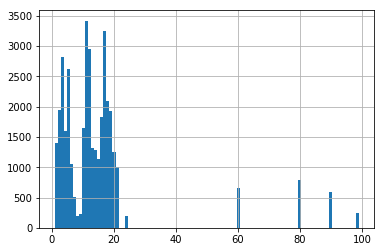

In [114]:
train['region_code'].hist(bins=100)

In [0]:
# train['regional_code'] = train['regional_code'].astype('category')

In [112]:
train.groupby('region_code')['status_group'].value_counts(normalize=True)

region_code  status_group           
1            functional                 0.454936
             non functional             0.445637
             functional needs repair    0.099428
2            functional                 0.647721
             non functional             0.294931
             functional needs repair    0.057348
3            functional                 0.601207
             non functional             0.325639
             functional needs repair    0.073153
4            functional                 0.571606
             non functional             0.399751
             functional needs repair    0.028643
5            functional                 0.530309
             non functional             0.396874
             functional needs repair    0.072817
6            functional                 0.659434
             non functional             0.328302
             functional needs repair    0.012264
7            functional                 0.573674
             non functional     